## Gaussian Process Regression
#### Dano Gillam

In [1]:
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
import scipy.linalg as la
%matplotlib inline


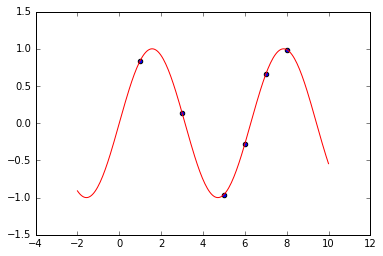

In [2]:
#our given data
data_xvals = np.atleast_2d( [ 1.0, 3.0, 5.0, 6.0, 7.0, 8.0 ])
data_yvals = np.sin( data_xvals )
plt.scatter(data_xvals[0],data_yvals[0])

#the actual graph
actual_X = np.linspace(-2,10,200)
actual_Y = np.sin( actual_X )
plt.plot(actual_X,actual_Y,'r')
plt.show()

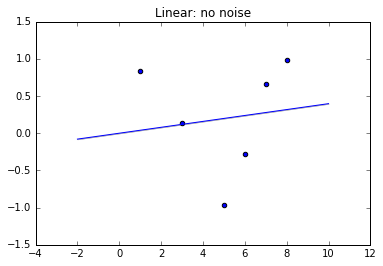

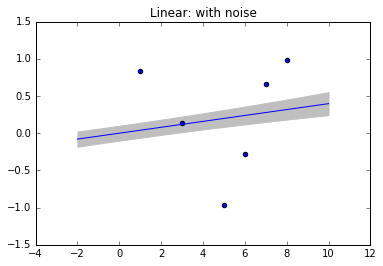

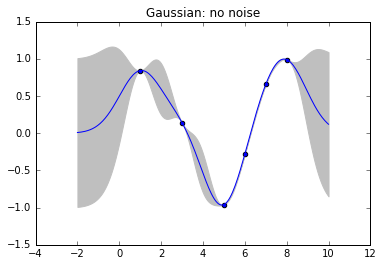

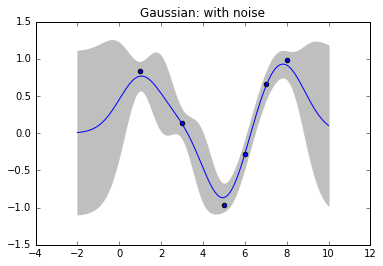

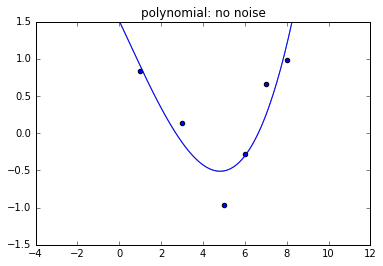

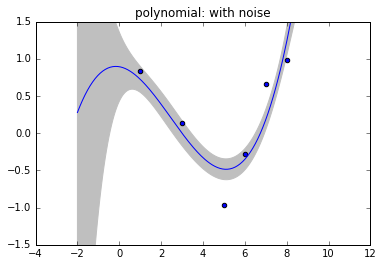

In [4]:
def linear_kernal(x0,x1):
    return np.dot(x0,x1)

def gaussian_kernal(x0,x1,var=1,thick=1):
    return np.exp(-thick*(x0-x1)**2/2./var)

def polynomial_kernal(x0,x1,lam=1,M=3,r=1):
    return (lam*np.dot(x0,x1)+r)**M

def get_cov(x,k=linear_kernal):
    #Args: k(a kernal function), x (a set of data)
    #Returns: K :a covariance matrix
    N = x.shape[0]
    K = np.ones((N,N))
    for row in xrange(N):
        for col in xrange(N):
            K[row,col]=k(x[row],x[col])  
    return np.array(K)



def process_regression(data_xvals,data_yvals,k=linear_kernal,start=-2,end=10,noisy = False,var=.1,title=''):
    Xtests = np.linspace(start,end,200) #list of X_0 test sets
    X      = data_xvals[0] #;print 'X\n',X
    Y      = data_yvals[0] #;print 'Y\n',Y
    K      = get_cov(X,k)  #;print 'K\n',K
    if noisy: K+=np.eye(len(X))*var
    K_inv  = la.pinv(K)    #;print 'Kinv\n',K_inv
    
    YY     = np.zeros((200,3))
    
    for i,X_0 in enumerate(Xtests):
        K_0   = k(X,X_0)    #;print 'K_0\n',K_0
        K_00  = k(X_0,X_0)  
        if noisy: K_00+=var
        mew_0 = (np.dot(K_0,K_inv).dot(Y.T)) #;print 'mew_0\n',K_00
        var_0 = (K_00 - np.dot(K_0,K_inv).dot(K_0.T))
        YY[i] = mew_0,mew_0+var_0,mew_0-var_0
    plt.gca().fill_between(Xtests,YY[:,1],YY[:,2],color='0.75')
    plt.title(title)
    plt.plot(Xtests,YY[:,0])
    plt.scatter(X,Y)
    plt.ylim(-1.5,1.5)
    plt.show()
    
    
#linear kernal
process_regression(data_xvals,data_yvals,title='Linear: no noise')
process_regression(data_xvals,data_yvals,noisy=True,title='Linear: with noise')

#Gaussian kernal
process_regression(data_xvals,data_yvals,gaussian_kernal,title='Gaussian: no noise')
process_regression(data_xvals,data_yvals,gaussian_kernal,noisy=True,title='Gaussian: with noise')

#Polynomial kernal
process_regression(data_xvals,data_yvals,polynomial_kernal,title='polynomial: no noise')
process_regression(data_xvals,data_yvals,polynomial_kernal,noisy=True,title='polynomial: with noise')
